In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import os
from keras.preprocessing.image import ImageDataGenerator
train_dir = os.path.join('/content/gdrive/MyDrive/faces2/', 'Training')
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),class_mode='binary')

Found 2051 images belonging to 2 classes.


In [16]:
from keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),class_mode='categorical')
validation_dir = os.path.join('/content/gdrive/MyDrive/faces2/', 'Validation')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150, 150),class_mode='binary')

Found 819 images belonging to 2 classes.


In [86]:
from keras import layers
from keras import models
from tensorflow.keras.layers import Flatten,Dense
model =models. Sequential([
    Flatten(input_shape=(150,150, 3)),
    Dense(500, activation='relu'),
    Dense(300, activation='relu'),
    Dense(50, activation='relu'),
   # Dense(1, activation='sigmoid')
])
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
type(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 67500)             0         
                                                                 
 dense_60 (Dense)            (None, 500)               33750500  
                                                                 
 dense_61 (Dense)            (None, 300)               150300    
                                                                 
 dense_62 (Dense)            (None, 50)                15050     
                                                                 
 dense_63 (Dense)            (None, 256)               13056     
                                                                 
 dense_64 (Dense)            (None, 1)                 257       
                                                                 
Total params: 33929163 (129.43 MB)
Trainable params: 

NoneType

In [87]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [88]:
epochs = 10  # Increase the number of epochs for better training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/10
65/65 [==============================] - 60s 903ms/step - loss: 1.2753 - acc: 0.5000 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/10
65/65 [==============================] - 60s 930ms/step - loss: 0.7064 - acc: 0.5000 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 3/10
65/65 [==============================] - 58s 894ms/step - loss: 0.6984 - acc: 0.5000 - val_loss: 0.7127 - val_acc: 0.5000
Epoch 4/10
65/65 [==============================] - 58s 894ms/step - loss: 0.6965 - acc: 0.5000 - val_loss: 0.6954 - val_acc: 0.5000
Epoch 5/10
65/65 [==============================] - 55s 847ms/step - loss: 0.6946 - acc: 0.5000 - val_loss: 0.6980 - val_acc: 0.5000
Epoch 6/10
65/65 [==============================] - 56s 859ms/step - loss: 0.6950 - acc: 0.5000 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 7/10
65/65 [==============================] - 54s 826ms/step - loss: 0.6944 - acc: 0.5000 - val_loss: 0.6951 - val_acc: 0.5000
Epoch 8/10
65/65 [==============================] - 56s 865ms/step - 

KeyboardInterrupt: ignored

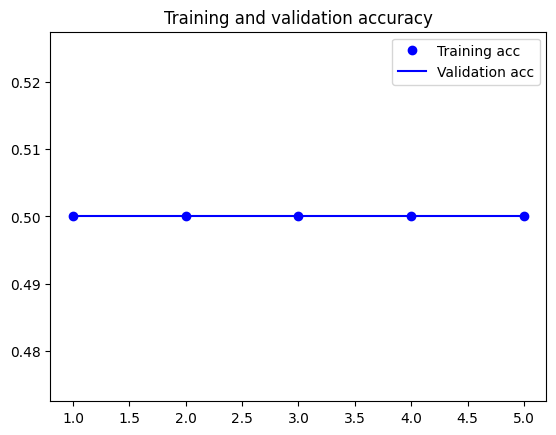

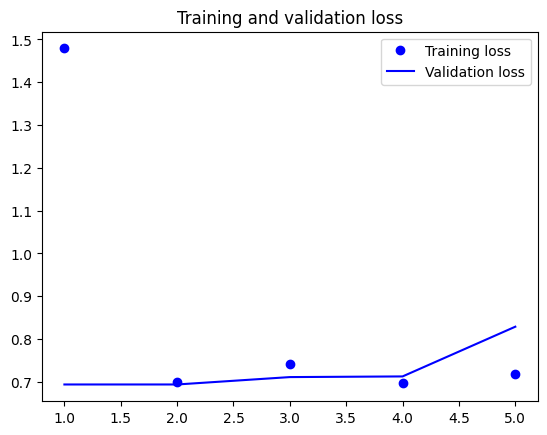

In [69]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
import os
import cv2  # OpenCV for image resizing
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Define the path to the image
test_dir = '/content/gdrive/MyDrive/faces2/Validation/male/079591.jpg.jpg'

# Load the image using OpenCV and resize it to the desired target size
target_size = (150, 150)
img = cv2.imread(test_dir)
img = cv2.resize(img, target_size)

# Rescale the image to the range [0, 1]
img = img / 255.0

# Create a single-image generator
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(
    x=np.array([img]),  # Pass the resized image as a NumPy array
    y=None,  # No labels needed for inference
    batch_size=1,  # Set batch size to 1 for a single image
    shuffle=False,  # No need to shuffle for inference
    # You can add more image augmentation options here if needed
)

# Make predictions using your model
y_pred = model.predict(test_generator)

# The 'predictions' variable now contains the model's predictions for the single image
y_pred_classes = (y_pred > 0.5).astype(int)
print(y_pred_classes)

1/1 [==============================] - 0s 46ms/step
[[0 1]]


In [70]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='binary'
)

Found 819 images belonging to 2 classes.


In [74]:
# Assuming y_pred is the output of your model's prediction
y_pred = model.predict(test_generator)

# Convert probabilities to class labels (assuming binary classification)
y_pred_classes = (y_pred > 0.5).astype(int)

# Ensure y_pred_classes has the same number of samples as your test data
assert y_pred_classes.shape[0] == test_generator.samples


26/26 [==============================] - 3s 114ms/step


In [75]:
report = classification_report(test_generator.classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       408
           1       0.00      0.00      0.00       411

    accuracy                           0.50       819
   macro avg       0.25      0.50      0.33       819
weighted avg       0.25      0.50      0.33       819



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# Assuming you have already trained your Keras model and it's stored in a variable 'model'
import pickle

# Save the model to a file using pickle
with open('model_Deep_Faces.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
